# Sentiment analysis model

In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import torch

# Loading our dataset

In [17]:
# loading reviews dataset
reviews = tf.keras.utils.text_dataset_from_directory(
    'data/train',
    batch_size=32,
    seed=123,
)
reviews.class_names

Found 25000 files belonging to 2 classes.


['neg', 'pos']

In [33]:
texts = []
labels = []

for batch, label in reviews:
    batch_texts = [t.decode("utf-8") for t in batch.numpy()]
    texts.extend(batch_texts)
    labels.extend(label.numpy())



In [34]:
print(labels[0])

0


In [41]:
# print 1 examples text and its label
# print('text', texts[1])
# print('label', labels[1])
# print('text2' , texts[2])
# print('label2' , labels[2])
# print('text3' , texts[3])
# print('label3' , labels[3])
# print('text4' , texts[4])
# print('label4' , labels[4])
print('text5' , texts[5])
print('label5' , labels[5])

text5 Now here's a film straight out of my childhood, my family used to taped; but it kind of got tapped over and losted over the years. Now I was fortunate to watch the whole film on youtube.com; I had love this wonderful film when I watched it as kid, and after watching again (online), I still do today. My favorite song from the movie is "Candy Hearts and Paper Flowers" (I will always remember that sweet song forever). <br /><br />I was surprised when I looked at the opening credits (on who animated who),that some of the animators date back to 1930s (WOW! that's like 47 years).
label5 1


# Embedding the reviews for sentiment analysis 

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
# review_embeddings = model.encode(texts, show_progress_bar=True , batch_size=32)

Batches:   0%|          | 0/782 [00:00<?, ?it/s]c:\Users\25194\Desktop\Sentiment-Analyzer\.venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Batches: 100%|██████████| 782/782 [11:28<00:00,  1.14it/s]


In [ ]:
# # save the embeddings
# np.save('models/review_embeddings.npy', review_embeddings)
# np.save('models/review_labels.npy', labels)


In [45]:
reviews_emb = np.load('models/review_embeddings.npy')
labels = np.load('models/review_labels.npy')
test_emb = np.load('models/test_embeddings.npy')
reviews_emb.shape, labels.shape

((25000, 384), (25000,))

In [48]:
print(f"review 5" , reviews_emb[5].shape)
print(f"label 5" , labels[5])

review 5 (384,)
label 5 1


# Building the Neural Network

In [49]:
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential  
sentiment_model = Sequential([
    Input(shape=(384,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification
])
sentiment_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,409 (193.00 KB)

 Trainable params: 49,409 (193.00 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling and fitting our model

In [50]:
sentiment_model.compile(optimizer='adam',
              loss='binary_crossentropy', metrics=['accuracy'])
sentiment_model.fit(reviews_emb, labels, epochs=10 ,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7472 - loss: 0.5411 - val_accuracy: 0.7968 - val_loss: 0.4301
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8070 - loss: 0.4191 - val_accuracy: 0.8052 - val_loss: 0.4179
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8093 - loss: 0.4062 - val_accuracy: 0.8100 - val_loss: 0.4104
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8213 - loss: 0.3931 - val_accuracy: 0.8158 - val_loss: 0.4051
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8280 - loss: 0.3811 - val_accuracy: 0.8150 - val_loss: 0.4011
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8288 - loss: 0.3764 - val_accuracy: 0.8192 - val_loss: 0.3993
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8393 - loss: 0.3629 - val_accuracy: 0.8160 - val_loss: 0.3944
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8453 - loss: 0.3544 - val_accuracy: 0.

In [57]:
# save the model
sentiment_model.save('models/sentiment_modelv1.keras')

In [ ]:
# model evaluation
test_set = tf.keras.utils.text_dataset_from_directory(
    'data/test',
    batch_size=32,
    seed=123,
)

test_texts = []
test_labels = []
for batch, label in test_set:
    batch_texts = batch.numpy()
    batch_texts = [text.decode('utf-8') for text in batch_texts]
    test_labels.extend(label.numpy())
    test_texts.extend(batch_texts)
test_embeddings = model.encode(test_texts, show_progress_bar=True , batch_size=32)

Found 25000 files belonging to 2 classes.


Batches:   0%|          | 0/782 [00:00<?, ?it/s]c:\Users\25194\Desktop\Sentiment-Analyzer\.venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Batches: 100%|██████████| 782/782 [12:21<00:00,  1.05it/s]


In [ ]:
# np.save('models/test_embeddings.npy', test_embeddings)


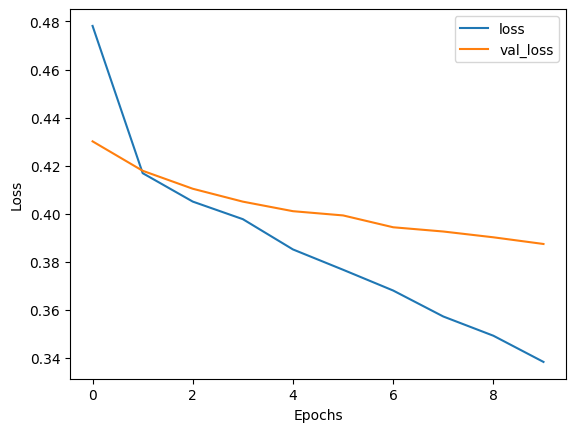

In [51]:
# plot the training history
import matplotlib.pyplot as plt
history = sentiment_model.history.history
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [55]:
# test on custom text
texts = ['i wrong this product','i love this product', 'a very bad experience', 'a great experience' , 'banana love explosion happy' , 'banana hate explosion death']
embeddings = model.encode(texts, show_progress_bar=True, batch_size=32)
predictions = sentiment_model.predict(embeddings)
print(embeddings)
print(predictions)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\25194\Desktop\Sentiment-Analyzer\.venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Batches: 100%|██████████| 1/1 [00:00<00:00, 69.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[-0.00442658  0.02316171  0.0232179  ...  0.01262249  0.06203079
   0.04153263]
 [-0.08651585  0.08132575  0.00023941 ...  0.05201458  0.07558699
  -0.02006064]
 [-0.01738658  0.07529033  0.01241104 ... -0.02394756 -0.06441312
   0.03754763]
 [-0.05345276  0.08492634  0.03935171 ... -0.00599968 -0.05580477
   0.08646457]
 [-0.0740637   0.00414008  0.0522396  ...  0.00867213  0.02192712
  -0.00728061]
 [-0.0317535   0.02135855  0.01958641 ... -0.02735322  0.01297485
   0.00814243]]
[[0.17552896]
 [0.9999674 ]
 [0.02198304]
 [0.9999601 ]
 [0.9998334 ]
 [0.14739156]]
